# Machine Learning 2018.3
> - **Lista 3**
- **Lucas Lopes Felipe** - *PPGI*
- **Turma**: *CPS-863 / COS-623 / MAB-608*
- **Professores**: Edmundo, Daniel S. Menascé e Rosa Leão

## Base de Dados

> As características dos dados fornecidos são: idade do paciente, peso (kg), carga final (watts) e VO$_2$ máximo (mg/Kg/min). Fornecemos um ($1$) arquivo com dados de $1.172$ pacientes coletados pelo Professor e sua equipe: *Dados-medicos.csv*.

In [1]:
import pandas as pd
df = pd.read_csv('./data/Dados-medicos.txt', sep=" ")
df.head()

,Idade (anos),Peso (kg),Carga Final,VO2 medido máximo (mL/kg/min)
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405


> Antes de fazer as questões Você deve escolher **aleatoriamente** um subconjunto de 1.000 amostras para treinar os modelos e as 172 restantes serão usados para testar o modelo. Indique, no início do seu relatório, o vetor de índice das amostra escolhidas para treinamento e para teste. (Por exemplo: vetor de treinamento $t = \langle 1, 0, 0, 1, 1, 1, 0, . . .\rangle$, onde $t(i) = 1$ se a i-ésima amostra foi escolhida para treinamento, e $t(i) = 0$ para teste.

Train: 1000 / Test: 172 / Total: 1172

Separação entre Treino (Branco) e Teste (Preto) dispostos em uma matriz 34 x 35


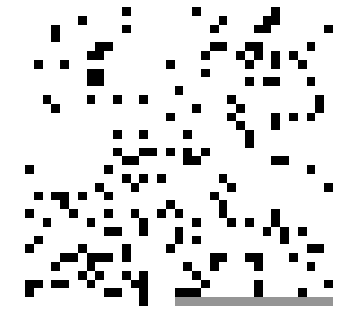

In [11]:
import numpy as np # Biblioteca para Algebra Linear
import matplotlib.pyplot as plt # Biblioteca para Plot
import seaborn as sns # Biblioteca de Visualização de Dados baseado no Matplotlib
plt.style.use('seaborn') # Estilo de gráfico

def filter(total, test):
    t = np.ones(total, dtype=int)
    i = test
    while i > 0:
        pos = np.random.randint(total)
        if t[pos] == 1:
            t[pos] = 0
            i -= 1
    return (t == 1)

t = filter(1172, 172)    
train = df[t]
test  = df[~t]

print('Train:', len(train), '/ Test:', len(test), '/ Total:', len(df))

d  = int(np.ceil(np.sqrt(len(t))))
tm = np.append(t * 1, np.full(len(t) % d + 1, .5))
tm = np.reshape(tm, (d - 1, d))

print('\nSeparação entre Treino (Branco) e Teste (Preto) dispostos em uma matriz', d - 1, 'x', d)
plt.grid(False)
plt.axis('off')
plt.imshow(1 - tm)

## Questão 1

#### 1. Considere as colunas $3$ e $4$ ($\mathrm{carga}$ e $\mathrm{VO}_{2max}$) dos dados fornecidos. Seja $p(y \mid x, \theta) = \mathcal{N}(y \mid w^T \phi(x), \sigma^2)$ onde $y$ é o $\mathrm{VO}_{2max}$, $x = \mathrm{carga}$  e $\phi(x) = 1, x,..., x^d$. Use regressão linear e ache os parâmetros do modelo.

In [3]:
import numpy as np

def phi(x, d):
    v = []
    for i in range(d + 1):
        v.append(x ** i)
    return np.array(v, dtype=float).T

def linear_regression(X, y):
    XTX     = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTy     = X.T.dot(y)
    theta   = XTX_inv.dot(XTy)
    return theta

X_train = np.array(train['Carga Final'])
y_train = np.array(train['VO2 medido máximo (mL/kg/min)'])

- experimente diferentes valores de $d$.

In [4]:
Ds = [1, 4, 5, 7, 9]

phis = []
for d in Ds:
    phis.append(phi(X_train, d))
    
thetas = []
for p in phis:
    thetas.append(linear_regression(p, y_train))
    
plot_space = np.linspace(min(X_train), max(X_train))
    
linspaces = []
for d in Ds:
    linspaces.append(phi(plot_space, d))

models = []
for l, t in zip(linspaces, thetas):
    models.append(l.dot(t))

- plote as funções encontradas, junto com os dados de treinamento.

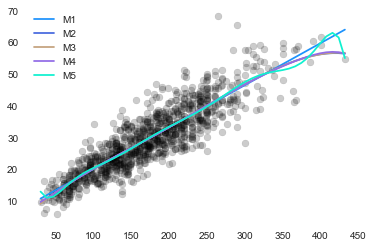

In [5]:
plt.scatter(X_train, y_train, c='k', alpha=0.2)

def randc():
    c = ()
    for i in range(3):
        r = np.random.uniform(0, 1)
        c += (r,)
    return c

for i, m in enumerate(models):
    lb = 'M' + str(i + 1)
    plt.plot(plot_space, m, c=randc(), label=lb)

plt.legend()
plt.gca().set_facecolor('w')
plt.show()

In [6]:
def mse(y_pred, y_true):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

predictions = []
for p, t in zip(phis, thetas):
    predictions.append(p.dot(t))

for i, y in enumerate(predictions):
    print('Erro do Modelo', i + 1, '( d =', Ds[i], ') no Treinamento:', mse(y, y_train))

Erro do Modelo 1 ( d = 1 ) no Treinamento: 25.102108659084408
Erro do Modelo 2 ( d = 4 ) no Treinamento: 24.95753725289964
Erro do Modelo 3 ( d = 5 ) no Treinamento: 24.957270132905926
Erro do Modelo 4 ( d = 7 ) no Treinamento: 24.953084197638514
Erro do Modelo 5 ( d = 9 ) no Treinamento: 24.804460565778086


- qual é o $NLL(w)$ encontrado em cada caso? Explique.

$$ \text{NLL} ({\bf \theta}) = - \sum_{i=1}^{N} \log p(y_i \mid {\bf x}_i, {\bf \theta}) $$

- compare os valores previstos pelo modelo escolhido com os valores reais dos dados de teste. Você está satisfeito com o modelo escolhido?

In [7]:
X_test = np.array(test['Carga Final'])
y_test = np.array(test['VO2 medido máximo (mL/kg/min)'])

phis_test = []
for d in Ds:
    phis_test.append(phi(X_test, d))
    
predictions_test = []
for p, t in zip(phis_test, thetas):
    predictions_test.append(p.dot(t))

for i, y in enumerate(predictions_test):
    print('Erro do Modelo', i + 1, '( d =', Ds[i], ') no Teste:', mse(y, y_test))

Erro do Modelo 1 ( d = 1 ) no Teste: 25.64293607025242
Erro do Modelo 2 ( d = 4 ) no Teste: 26.15353512155394
Erro do Modelo 3 ( d = 5 ) no Teste: 26.16035080419756
Erro do Modelo 4 ( d = 7 ) no Teste: 26.126261007127003
Erro do Modelo 5 ( d = 9 ) no Teste: 26.561806169491817


Durante o treinamento, os modelo de maior grau polinomial ficaram com o menor erro. Porém, durante o teste, estes tiveram desempenho pior do que o de grau 1, que foi capaz de ter uma melhor generalização.

Isso se da pelo overfitting, onde, apesar dos outros modelos se adequarem bem ao conjunto de treinamento, não foi capaz de generalizar o suficiente para o de teste.

#### 2. Repita o item anterior considerando as colunas 2, 3 e 4 (peso, carga e VO$_{2max}$).

In [8]:
X_train_2 = np.array(train[['Peso (kg)', 'Carga Final']])
X_test_2  = np.array(test[['Peso (kg)', 'Carga Final']])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_poly   = poly_reg.fit_transform(X_train_2)

model = LinearRegression()
model.fit(x_poly, y_train)

pred = model.predict(poly_reg.fit_transform(X_test_2))

print('Erro do Modelo que utiliza Peso e Cargo no Teste:', mse(pred, y_test))

Erro do Modelo que utiliza Peso e Cargo no Teste: 8.858250679286769


#### 3. Repita o item anterior considerando as colunas 1, 2, 3 e 4 (idade, peso, carga e VO$_{2max}$).

In [9]:
X_train_3 = np.array(train[['Idade (anos)', 'Peso (kg)', 'Carga Final']])
X_test_3  = np.array(test[['Idade (anos)', 'Peso (kg)', 'Carga Final']])

poly_reg = PolynomialFeatures(degree=7)
x_poly   = poly_reg.fit_transform(X_train_3)

model.fit(x_poly, y_train)

pred = model.predict(poly_reg.fit_transform(X_test_3))

print('Erro do Modelo que utiliza Idade, Peso e Carga no Teste:', mse(pred, y_test))

Erro do Modelo que utiliza Idade, Peso e Carga no Teste: 48.930207049329596


- Você acha que alguma das variáveis é menos importante para se estimar o VO$_{2max}$? Ou todas são importantes? Explique.

De acordo com os resultados apresentados pelos modelos, cujo utilizam diferentes *features*, acrescentar a variável 'Peso (Kg)' teve um significativo aumento de desempenho na predição. Porém, o mesmo não ocorre ao adicionar a variável 'Idade (anos)'.

A partir disto, podemos concluir que o valor $VO_{2max}$ não é fundamentalmente determinado pela idade, mas possui razoável influência quanto ao peso.

#### 4. O VO$_{2max}$ pode ser estimado pela seguinte equação de acordo com o _American College of Sports Medicine_: VO$_{2max} \approx (W \times 11.4 + 260 + peso \times 3, 5) \, / \, peso$, onde $W$ é a carga máxima em watts, o peso corporal é em kg e a constante de 260 mL/min indica o volume de oxigênio correspondente ao gasto energético necessário para mover os pedais do teste de esforço sem qualquer resistência adicionada.

- Compare essa equação com a do modelo que você obteve considerando carga e peso.

In [10]:
def VO_2max(W, peso):
    return (W * 11.4 + 260 + peso * 3.5) / peso

pred_ACSM = []
for x in X_test_2:
    pred_ACSM.append(VO_2max(x[1], x[0]))
    
print('Erro do Modelo baseado na equação do ACSM para os dados de Teste:', mse(pred_ACSM, y_test))

Erro do Modelo baseado na equação do ACSM para os dados de Teste: 9.21111276846597


- Qual a vantagem que você obteve (se existe alguma) com a equação considerando a idade? Exemplifique.

O erro do Modelo que considera **Idade** é muito maior à equação utilizada pelo ACSM. Porém, o Modelo que utiliza apenas **Peso** e **Carga** apresentou predição similar à equação.